# Computing Max Drawdown
### Data File: US S&P stock return data based on Market Capitalisation

In [1]:
import pandas as pd

importing the Data set referred for analysis

In [2]:
retset = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,
                    parse_dates=True,na_values=-99.99)

In [3]:
retset.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


Header is set and the date has become the index which is what we wanted to achieve as well as the parsing will help us later

Do also observe that the <=0 column been turned to NaN values which is Pythons way of signifying the NA values when specified


In [4]:
rets=retset[["Lo 10","Hi 10"]]
rets.columns=["Smallcap","Largecap"]
rets=rets/100
rets.head(2)

,Smallcap,Largecap
192607,-0.0145,0.0329
192608,0.0512,0.0370


1. We are concentrating on the Small cap and Large cap stocks for this analysis
2. We took took the lowest ten and Highest 10 percent stocks by Market capitalisation for this analysis
3. The above chunk has just curtailed my data set to include only the relevant data required for analysis

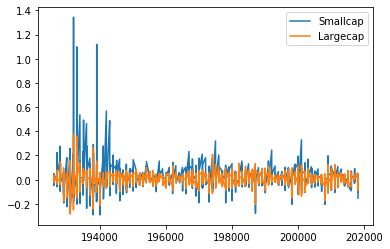

In [5]:
rets.plot.line()

A rough representation above for the return plot of the Small cap vs large cap data.
What we need to modify though is the way Date axis representation has been done in terms of numbers 
which really do not make much sense

#### Modifying Datestamp

In [6]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

Querying on the index brings out the datatype format as an integer which is what has attributed to the rough values displayed in the plot.
Sensible thing would be to change the Dtype format to Date time which would also help in referencing later on

In [7]:
rets.index=pd.to_datetime(rets.index,format="%Y%m")

Documentation on the to date time method is available at https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime

In [8]:
rets.head()

,Smallcap,Largecap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


Now this looks good plus it also has the added impact of indexing much easily. For example lets say we would like to view all the retun sets for our data in the year 1980. :)

In [9]:
rets["1980"]

,Smallcap,Largecap
1980-01-01,0.1321,0.0483
1980-02-01,0.0050,-0.0171
1980-03-01,-0.1751,-0.0748
1980-04-01,0.0399,0.0458
1980-05-01,0.0645,0.0647
1980-06-01,0.0420,0.0247
1980-07-01,0.0903,0.0691
1980-08-01,0.0830,0.0121
1980-09-01,0.0656,0.0275
1980-10-01,0.0624,0.0037


What we dont like is that the Day is inconsequential and we have to remove that out 
to make the data look more homogenous with only Year and month in it

In [10]:
rets.index=rets.index.to_period("M")
rets.head()

,Smallcap,Largecap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [11]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

### Computing Wealth index

Wealth index is the value of the portfolio as it compounds over time.
In our case we start with USD 1000

We will start with the largecap data series and do the analysis on it first

Creating a wealth index is replicated by capturing the compounded growth of an amount over time with no other investment or reduction added to it

In [12]:
wealth_index=1000*(1+rets["Largecap"]).cumprod()

Returns converted to 1+R format and we would be computing the cumulative product of the return in the whole data series

In [47]:
wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: Largecap, Length: 1110, dtype: float64

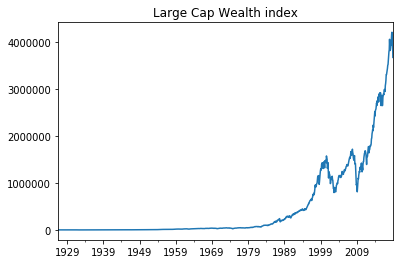

In [48]:
wealth_index.plot(title="Large Cap Wealth index")

### Compute Previous Peaks

Previous peaks can be computed fromm the Wealth index generated by calling a max function in the cumulative series - cummax()

In [15]:
previous_peaks=wealth_index.cummax()

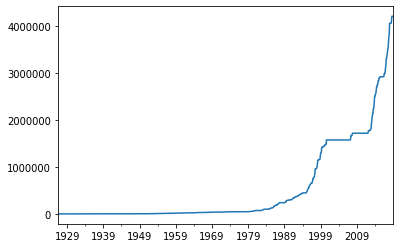

In [16]:
previous_peaks.plot()

This line does not ever go down because it is plotting the peaks in the series

### Computing max drawdown in the largecap series

In [17]:
drawdown=(wealth_index-previous_peaks)/previous_peaks

THe above would give out the negative returns in comparision to the previous peaks which wuld mean it would capture the drawdowns as negative percentage in the plot when done

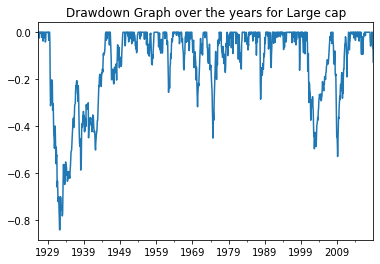

In [49]:
drawdown.plot(title="Drawdown Graph over the years for Large cap")

In [19]:
drawdown.head()


1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: Largecap, dtype: float64

max drawdown means the minimum number needs to be queried which can be seen as below


In [20]:
drawdown.min()

-0.8400375277943123

which year is this extreme loss of wealth that took place

In [21]:
drawdown.idxmin()

Period('1932-05', 'M')

An article capturing the Great crash that started in 1929 and reached its low in 1932

https://www.politico.com/story/2016/07/us-stock-market-hits-bottom-july-8-1932-225082

If the need is to capture drawdown from a particular year onwards we would use slicing

In [22]:
x=drawdown["1975":]

In [23]:
x.min()

-0.5280945042309304

In [24]:
x.idxmin()

Period('2009-02', 'M')

In [25]:
x.head()

1975-01   -0.293370
1975-02   -0.250053
1975-03   -0.219005
1975-04   -0.177534
1975-05   -0.127364
Freq: M, Name: Largecap, dtype: float64

The above shows that post slicing we created a temporary data frame and calculated the lowest return/max drawdown in the same and when it occurred. Evidently this was the depression and Sell off post 2008 crisis

https://en.wikipedia.org/wiki/United_States_bear_market_of_2007%E2%80%932009

Now that we have down the analysis of the Large caps we can repeat the same for Small caps data series or we can create a function to automate the set of steps for any data series

## Drawdown Function

In [26]:
def Drawdown(return_series: pd.Series):
    """
    Documentation String:
    Takes a Timeseries of Equity return.
    Computes and returns a Data frame with:
    1. Wealth index
    2. Previous peaks
    3. Percentage Drawdown
    """
    wealth_index= 1000*(1+return_series).cumprod()
    previous_peaks=wealth_index.cummax()
    drawdown=(wealth_index-previous_peaks)/previous_peaks
    
    return pd.DataFrame({
        "Wealth": wealth_index,
        "peaks": previous_peaks,
        "Drawdown": drawdown
    })


Above We have created a function with all the computations we have down till now being returned as three parameters from the function call.
This would mean that we would avoid coding for each time series individually and be able to call the function as and when required.

Lets see if this works with the Largecap data we have analysed previously

In [27]:
Drawdown(rets["Largecap"]).head()

,Wealth,peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


So there are the three computations that are available to us in a Snapshot. Lets try this for Small caps

In [28]:
Drawdown(rets["Smallcap"]).head()

,Wealth,peaks,Drawdown
1926-07,985.500000,985.500000,0.000000
1926-08,1035.957600,1035.957600,0.000000
1926-09,1045.592006,1045.592006,0.000000
1926-10,994.985353,1045.592006,-0.048400
1926-11,987.224467,1045.592006,-0.055822


to obtain specific column in the data frame do the following:
    

In [29]:
Drawdown(rets["Smallcap"])[["Wealth","peaks"]].head()

,Wealth,peaks
1926-07,985.500000,985.500000
1926-08,1035.957600,1035.957600
1926-09,1045.592006,1045.592006
1926-10,994.985353,1045.592006
1926-11,987.224467,1045.592006


Text(0, 0.5, 'Wealth Vs Peaks')

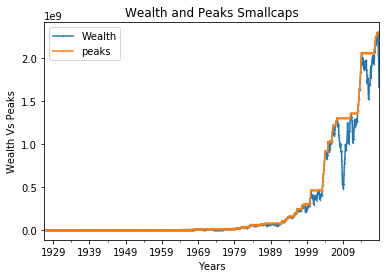

In [30]:
"""Lets plot the Data by calling plot instead of head function"""

ax=Drawdown(rets["Smallcap"])[["Wealth","peaks"]].plot(marker='.', markersize=1,title="Wealth and Peaks Smallcaps")
ax.set_xlabel("Years")
ax.set_ylabel("Wealth Vs Peaks")

If we repeat this for largecaps we should be able to see the plot pertaining to Large cap data

Text(0, 0.5, 'Wealth Vs Peaks')

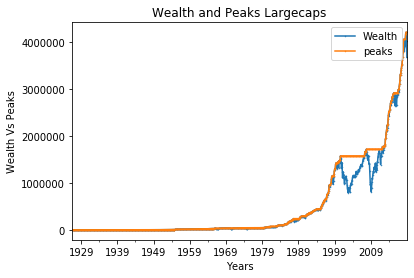

In [31]:
ax=Drawdown(rets["Largecap"])[["Wealth","peaks"]].plot(marker='.', markersize=1,title="Wealth and Peaks Largecaps")
ax.set_xlabel("Years")
ax.set_ylabel("Wealth Vs Peaks")

Now in both of this plots what we dont see is the Great crash that got triggered in 1929.
The same has got a flat trajectory in the overall picture but we might be able to capture the same if we look at it closely.

Text(0, 0.5, 'Wealth Vs Peaks')

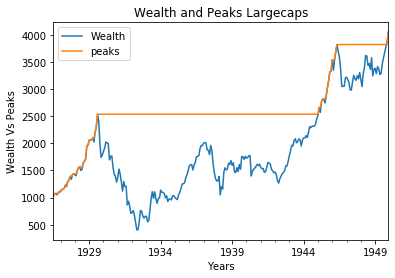

In [32]:
ax=Drawdown(rets[:"1949"]["Largecap"])[["Wealth","peaks"]].plot(title="Wealth and Peaks Largecaps")
ax.set_xlabel("Years")
ax.set_ylabel("Wealth Vs Peaks")


The following Plot will do a comparision of the Large cap vs Small cap drawdown in the period starting from 1975 

<Figure size 864x360 with 0 Axes>

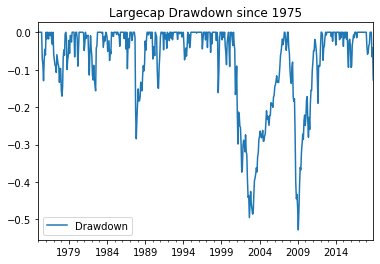

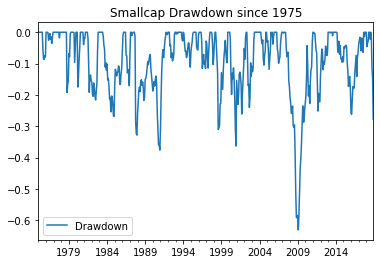

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
ax1=Drawdown(rets["1975":]["Largecap"])[["Drawdown"]].plot(title="Largecap Drawdown since 1975")
ax2=Drawdown(rets["1975":]["Smallcap"])[["Drawdown"]].plot(title="Smallcap Drawdown since 1975")

plt.show()

#### Calculating the Max Drawdown in the history

So what is the max drawdown that happend for large cap/Small cap and when?

In [34]:
Drawdown(rets["Largecap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

That was in the Great Crash lets see what Small caps Says:

In [35]:
Drawdown(rets["Smallcap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

Same okay. what was the extent of damage

In [36]:
Drawdown(rets["Smallcap"])["Drawdown"].min()


-0.8330007793945303

In [37]:
"""And"""
Drawdown(rets["Largecap"])["Drawdown"].min()

-0.8400375277943123

Pretty Identical. What about in modern era, the crash of 2008. Lets  see if that can be seen in data between 1980 onwards.

In [38]:
Drawdown(rets["1980":]["Largecap"])["Drawdown"].min()

-0.5280945042309304

In [39]:
Drawdown(rets["1980":]["Largecap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

Here it is the effect of the 2008 Crisis. lets see if the same is reflected for Small caps as well which it should

In [40]:
Drawdown(rets["1980":]["Smallcap"])["Drawdown"].min()

-0.6312068077252387

In [41]:
Drawdown(rets["1980":]["Smallcap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

Yup pretty Much identical reflecting all went down in the 2008 crisis.

## Conclusion : 
#### We cleaned up a data dump on the US Stock market categorised by Market capitalisation and then went down to extract Small cap and Large cap data to create a Wealth index , compute Past peaks and from it the Max drawdowns that hapened in the past. We also could analyse and check on some actual happenings that happened in the Equity market with this data analysis.